In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("../data/raw/2R segregacje SNP i SIL dla Janka.xlsx")

In [3]:
data = data.drop("class", axis=1)
data.head(10)

,CloneID,BK2,BK4,BK5,BK6,BK9,BK10,BK11,BK13,BK14,...,BK273,BK277,BK280,BK285,BK286,BK288,BK291,BK298,BK299,BK300
0,wax,d,d,d,d,d,d,b,d,b,...,d,d,d,d,d,d,d,d,d,d
1,wax_K,d,h,h,h,d,h,b,a,b,...,a,h,h,a,h,a,a,h,d,a
2,5487157_55:C>T,a,h,h,a,h,h,b,a,b,...,h,a,h,a,b,a,a,h,h,a
3,3743550_33:A>C,a,h,h,a,a,h,b,a,b,...,h,h,h,a,h,a,a,h,h,a
4,3890504_12:A>G,h,h,b,h,h,a,b,a,b,...,a,b,b,a,h,h,a,b,a,h
5,3749835_12:T>A,b,a,h,h,a,h,h,b,h,...,a,a,b,b,b,b,h,b,b,h
6,5803165_43:G>C,a,h,b,h,a,h,b,a,b,...,a,h,h,a,h,h,a,h,h,a
7,3580391_37:C>T,h,h,h,h,h,a,a,h,h,...,b,h,h,b,b,h,h,b,b,a
8,3596752_10:G>A,h,h,h,h,h,a,a,h,h,...,b,h,a,h,b,h,h,b,b,a
9,5497838_52:C>G,h,h,h,h,h,h,a,a,b,...,b,h,h,h,b,h,h,b,h,a


In [4]:
data = data.set_index("CloneID", drop=True)

In [5]:
feature_matrix = data.drop(["wax", "wax_K"], axis=0)

In [6]:
for column in feature_matrix.columns:
    print(column)
    print(feature_matrix[column].unique())

BK2
['a' 'h' 'b' '-' 'c' 'd']
BK4
['h' 'a' 'b' 'c' '-' 'd']
BK5
['h' 'b' 'a' 'c' '-' 'd']
BK6
['a' 'h' 'b' 'c' '-' 'd']
BK9
['h' 'a' 'b' '-' 'c' 'd']
BK10
['h' 'a' 'b' '-' 'c' 'd']
BK11
['b' 'h' 'a' '-' 'c' 'd']
BK13
['a' 'b' 'h' '-' 'c' 'd']
BK14
['b' 'h' 'a' '-' 'c' 'd']
BK15
['h' 'b' 'a' 'c' '-' 'd']
BK16
['h' 'a' 'b' '-' 'c' 'd']
BK17
['a' 'h' 'b' 'c' '-' 'd']
BK19
['a' 'h' 'b' '-' 'c' 'd']
BK21
['a' 'h' 'b' '-' 'c' 'd']
BK23
['b' 'h' 'a' '-' 'c' 'd']
BK26
['b' 'h' '-' 'a' 'c' 'd']
BK27
['h' 'b' 'a' 'c' '-' 'd']
BK29
['h' 'a' 'b' 'c' '-' 'd']
BK31
['h' 'a' 'b' '-' 'c' 'd']
BK32
['b' 'h' 'a' '-' 'c' 'd']
BK35
['b' 'h' 'a' '-' 'c' 'd']
BK36
['a' 'h' 'b' '-' 'c' 'd']
BK37
['a' 'h' 'b' '-' 'c' 'd']
BK38
['h' 'a' 'b' '-' 'c' 'd']
BK39
['a' 'h' 'b' '-' 'c' 'd']
BK42
['h' 'a' 'b' '-' 'c' 'd']
BK43
['b' 'h' 'a' '-' 'c' 'd']
BK44
['a' 'h' 'b' '-' 'c' 'd']
BK46
['a' 'h' 'b' '-' 'c' 'd']
BK47
['h' 'a' '-' 'b' 'c' 'd']
BK50
['b' 'h' 'a' '-' 'c' 'd']
BK51
['b' 'h' 'a' '-' 'c' 'd']
BK53
['h' 'b'

In [7]:
# wax segregation
wax_segregation = data.loc["wax"]
# wax_K segregation
wax_K_segregation = data.loc["wax_K"]

In [8]:
# Feature data encoding

In [9]:
coder = {"a": 1, "b": 2, "c": 3, "d": 4, "h": 5, "-":0}
for column in feature_matrix.columns:
    feature_matrix[column].replace(coder, inplace=True)

In [10]:
# Label data encoding

In [11]:
wax_segregation.value_counts()

d    146
b     38
Name: wax, dtype: int64

In [12]:
wax_segregation = wax_segregation.map({"d": 1, "b": 0})

In [13]:
wax_K_segregation.value_counts()

h    79
a    39
b    38
d    26
-     1
c     1
Name: wax_K, dtype: int64

In [14]:
wax_K_segregation = wax_K_segregation.map({"a": 1, "b": 2, "c": 3, "d": 4, "h": 5, "-": 0})

In [15]:
wax_data = feature_matrix.append(wax_segregation).T
wax_K_data = feature_matrix.append(wax_K_segregation).T

In [16]:
# Save data

In [17]:
wax_data.to_csv("../data/interim/wax_data.csv")
wax_K_data.to_csv("../data/interim/wax_K_data.csv")

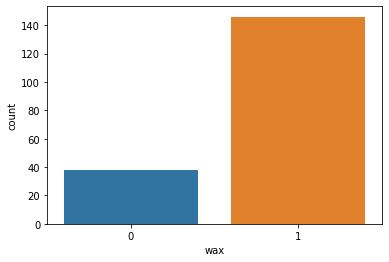

In [124]:
sns.countplot(wax_data["wax"])

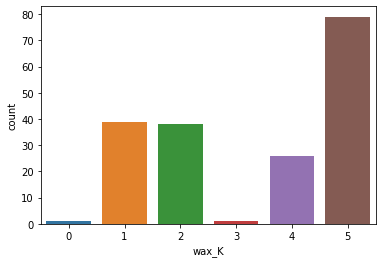

In [125]:
sns.countplot(wax_K_data["wax_K"])